## Prediction 
In this exercise you will create some simulated data and will fit simple
linear regression models.
  
  1. Create a vector `x` containing $100$ observations drawn from a $\mathcal{N}(0, 1)$ distribution as your feature. 
  2. Create a vector, `eps` (for $\epsilon$), containing $100$ observations drawn from a $\mathcal{N}(0, 0.25)$. 
  3. Using `x` and `eps` generate a vector `y` according to the model $y = −1 + 0.5x + \epsilon$.
  4. Create a scatterplot displaying the relationship between `x` and `y`.
  5. Fit a least squares linear model to predict `y` using `x` 
  6. Display the least squares line on the scatterplot 


In [1]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression # Fit the model with sklearn package

import warnings
warnings.filterwarnings("ignore")

np.random.seed(111)

# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
# Create a vector x containing  100  observations drawn from a  N(0,1) distribution as your feature
mu=0
sigma=1
n=100
x=np.random.normal(loc=mu,scale=sigma,size=n)
x

array([-1.13383833,  0.38431919,  1.49655378, -0.3553823 , -0.78753354,
       -0.45943891, -0.05916877, -0.3541735 , -0.73552305, -1.18393989,
        0.23889413, -0.58992026, -1.44058512,  0.77370311, -1.02796733,
       -0.09098625,  0.492003  ,  0.4246722 ,  1.28304882,  0.31598645,
       -0.4080822 , -0.06794759, -0.95242666, -0.1106774 ,  0.57059429,
        0.91542017, -1.66934051,  0.48271364, -0.31047267,  2.39468973,
        1.55093092, -0.64646518, -0.92893724, -1.65497614,  0.3501925 ,
       -0.14175652,  0.52108179, -0.02090086, -1.74384395, -0.79915888,
       -1.30357043,  0.178105  , -0.33440236, -0.30602713, -0.33240557,
        1.96294734,  0.71924249,  1.14288651,  2.08287697, -1.28464775,
        0.53812761, -0.04453941,  2.59716437, -0.05826628, -0.945287  ,
        0.54117239, -0.05500889,  1.12002081, -0.19164295, -0.61013842,
       -0.44457885, -2.2040093 , -0.43067048, -0.42509346,  0.14729199,
        0.42492427,  0.34725774, -0.27623555, -1.20229562,  1.03

In [13]:
# Create a vector, eps (for 𝜖 ), containing 100 observations drawn from a  N(0,0.25)
mu=0
sigma=0.25
n=100
esp=np.random.normal(loc=mu,scale=sigma,size=n)
esp

array([ 0.02592985, -0.00837732,  0.1691131 , -0.26306215, -0.34299114,
        0.11141566, -0.40910399, -0.15201426, -0.04328481, -0.23140208,
        0.22816445,  0.31398852,  0.0561165 , -0.12010492,  0.11569709,
       -0.0675729 , -0.09592357,  0.3029669 , -0.12231095,  0.12963722,
       -0.63331606,  0.16298728, -0.25788399,  0.00069292,  0.30638844,
        0.01107153,  0.04364773, -0.14102233, -0.02166366,  0.09901274,
       -0.28457235,  0.15927284,  0.19566698,  0.33007166, -0.0405533 ,
       -0.41547892,  0.15760076, -0.09926245, -0.17178238, -0.24332288,
       -0.37845021, -0.00233985,  0.43920325,  0.07154248,  0.2416987 ,
        0.11525579, -0.31615171, -0.47883758, -0.03035118,  0.32135386,
       -0.24540477, -0.06816715, -0.05843887, -0.07590927,  0.03744467,
        0.0215593 , -0.18422036, -0.55791718,  0.04981818,  0.0591383 ,
        0.0967698 ,  0.61547971,  0.3281638 ,  0.09772849, -0.10924962,
       -0.11398881, -0.50676079,  0.1800657 , -0.01188587,  0.21

In [14]:
#Calculate 𝑦=−1+0.5𝑥+𝜖 
y=-1 +(0.5*x)+esp
y


array([-1.54098932, -0.81621773, -0.08261001, -1.4407533 , -1.73675791,
       -1.11830379, -1.43868838, -1.32910101, -1.41104634, -1.82337202,
       -0.65238848, -0.98097161, -1.66417606, -0.73325337, -1.39828658,
       -1.11306603, -0.84992207, -0.484697  , -0.48078654, -0.71236955,
       -1.83735716, -0.87098652, -1.73409732, -1.05464578, -0.40831441,
       -0.53121838, -1.79102253, -0.89966551, -1.1769    ,  0.29635761,
       -0.50910689, -1.16395975, -1.26880163, -1.49741642, -0.86545705,
       -1.48635718, -0.58185835, -1.10971288, -2.04370435, -1.64290231,
       -2.03023543, -0.91328735, -0.72799793, -1.08147109, -0.92450409,
        0.09672946, -0.95653046, -0.90739432,  0.01108731, -1.32097001,
       -0.97634096, -1.09043686,  0.24014331, -1.10504242, -1.43519883,
       -0.7078545 , -1.2117248 , -0.99790678, -1.04600329, -1.24593091,
       -1.12551962, -1.48652494, -0.88717144, -1.11481824, -1.03560362,
       -0.90152668, -1.33313192, -0.95805207, -1.61303368, -0.27

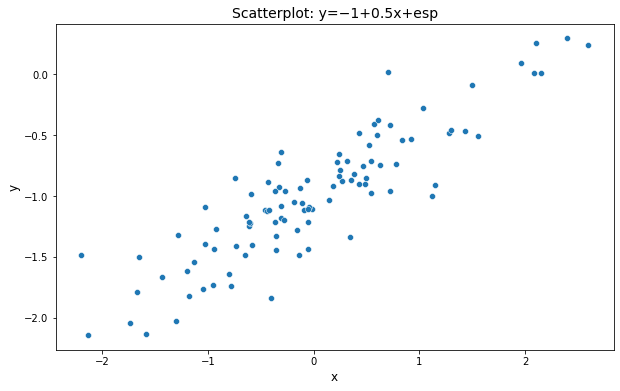

In [15]:
# Create a scatterplot displaying the relationship between x and y
fig, ax = plt.subplots(figsize=(10, 6))
_ = sns.scatterplot(x,y)
_ = ax.set_title('Scatterplot: y=−1+0.5x+esp', fontsize=14)
_ = ax.set_ylabel('y', fontsize=12)
_ = ax.set_xlabel('x', fontsize=12)
plt.show()

This is a positive linear relationship;as x increases y also increases.

In [16]:
# Fit a least squares linear model to predict y using x

#create a dataframe of the random values
d_ = {'x': x,'y': y}
df = pd.DataFrame(data=d_)
df.head()

X=df[["x"]].values
y=df[["y"]].values


lr = LinearRegression() 
lr.fit(X, y)
intercept=lr.intercept_
print("intercept = ",intercept)
slope=lr.coef_
print("slope = ",slope)
# Returns the R^2 which gives an idea about the goodness of fit:
r_2=round(lr.score(X, y),3)
print("r-squared: ", r_2)

y_pred=lr.predict(X)

,x,y
0,-1.133838,-1.540989
1,0.384319,-0.816218
2,1.496554,-0.082610
3,-0.355382,-1.440753
4,-0.787534,-1.736758


LinearRegression()

intercept =  [-0.99156206]
slope =  [[0.48035763]]
r-squared:  0.787


The model **intercept βo**= -0.99  and **slope β1**= 0.48 of Q3.5 results were practically equal to βo =-1  and β1 =0.5 of the  given 𝑦=−1+0.5𝑥+𝜖. 

The Q3.5 **R-squared** = 0.78 shows that the model fits the data well (78.7%) but could be better.

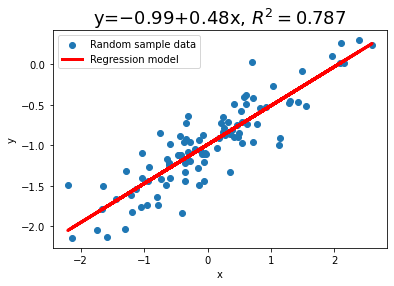

In [19]:
# Plot regression line
_=plt.scatter(X, y, label='Random sample data')
_=plt.plot(X, y_pred, color='red', linewidth=3, label='Regression model')
_=plt.title('y=−0.99+0.48x, $R^2= %.3f$' % r_2, fontsize=18)
_=plt.legend(loc="upper left")
_=plt.xlabel('x')
_=plt.ylabel('y')
_=plt.show()

array([ 0.02592985, -0.00837732,  0.1691131 , -0.26306215, -0.34299114,
        0.11141566, -0.40910399, -0.15201426, -0.04328481, -0.23140208,
        0.22816445,  0.31398852,  0.0561165 , -0.12010492,  0.11569709,
       -0.0675729 , -0.09592357,  0.3029669 , -0.12231095,  0.12963722,
       -0.63331606,  0.16298728, -0.25788399,  0.00069292,  0.30638844,
        0.01107153,  0.04364773, -0.14102233, -0.02166366,  0.09901274,
       -0.28457235,  0.15927284,  0.19566698,  0.33007166, -0.0405533 ,
       -0.41547892,  0.15760076, -0.09926245, -0.17178238, -0.24332288,
       -0.37845021, -0.00233985,  0.43920325,  0.07154248,  0.2416987 ,
        0.11525579, -0.31615171, -0.47883758, -0.03035118,  0.32135386,
       -0.24540477, -0.06816715, -0.05843887, -0.07590927,  0.03744467,
        0.0215593 , -0.18422036, -0.55791718,  0.04981818,  0.0591383 ,
        0.0967698 ,  0.61547971,  0.3281638 ,  0.09772849, -0.10924962,
       -0.11398881, -0.50676079,  0.1800657 , -0.01188587,  0.21

array([-0.23349154, -0.10752046, -0.18829013,  0.12465786,  0.04499426,
       -0.10158768,  0.07721341, -0.12193645, -0.07816347,  0.05514789,
       -0.15364766, -0.05160591, -0.07482938,  0.13818035,  0.07107082,
       -0.00827413,  0.05062207, -0.15552517,  0.13125717, -0.05500917,
       -0.10188044,  0.00786229, -0.06934523,  0.05959464,  0.01207784,
        0.02717798, -0.11194247, -0.08613137,  0.09008566, -0.09018366,
        0.11341654, -0.03152109, -0.00588216, -0.03505405, -0.15362346,
       -0.01766083, -0.14671806, -0.15279869,  0.08142475,  0.18177982,
       -0.00818221, -0.00896668, -0.01900161, -0.00313903, -0.06722998,
       -0.10687239,  0.03907944,  0.03649053, -0.16776036,  0.01887423,
       -0.22633165, -0.08690503,  0.18870265, -0.09834788,  0.18109965,
        0.03592259,  0.01272582, -0.04563561, -0.00713817,  0.16073653,
       -0.03818392, -0.06979163, -0.00561799, -0.05748435, -0.18472525,
       -0.11861946, -0.06291038,  0.0007617 , -0.04526208,  0.02

array([-1.47938477,  0.23715196,  1.69082697, -0.43077748,  0.10860298,
       -1.75841685,  0.53615146,  0.12318117,  0.55555523,  1.15782847,
       -2.45385638, -0.39899096,  0.07086895, -1.67047627,  1.30653051,
       -0.88387719,  0.4134757 , -0.23141595,  0.10518886,  0.29072381,
        1.50387829, -1.23815594, -0.54052633,  0.02685583, -1.3116659 ,
       -1.40329088, -1.34177299, -1.09315776,  0.95520505, -3.23962494,
       -1.5459787 , -0.70076445, -0.45564615, -0.67506159, -0.90713559,
        0.01133052,  1.21736876, -1.73667091, -2.20916583,  3.05359018,
        2.09199753,  0.24029438,  1.96838814, -1.25619016,  0.36587438,
        1.2539952 , -2.64426763, -1.03282896,  0.04691562, -1.47801049,
       -2.61571221,  1.31502806,  1.56076348,  0.8650095 , -0.7000542 ,
       -1.83858239,  0.64380385, -1.2880557 , -0.42921192, -0.53639096,
       -0.10881515, -0.26331576, -0.04799107, -1.47919369,  0.65413308,
       -2.90704072, -0.24776917, -0.67537653,  1.48053949,  1.96

,x,y,y_more,y_less
0,-1.133838,-1.540989,-3.046304,-1.800411
1,0.384319,-0.816218,-0.570688,-0.915361
2,1.496554,-0.082610,1.439104,-0.440013
3,-0.355382,-1.440753,-1.608469,-1.053033
4,-0.787534,-1.736758,-1.285164,-1.348773


LinearRegression()

Q3.5 original: intercept =  -0.991562059471384
Q3.5 original: slope =  [0.48035763]
Q3.5 original: r-squared:  0.787


LinearRegression()

increasing noise model: intercept  =  [-1.25908175]
increasing noise model: slope  =  [[0.46337344]]
increasing noise model: r-squared  =  0.093


LinearRegression()

decreasing noise model: intercept =  [-1.01191157]
decreasing noise model: slope =  [[0.49252415]]
decreasing noise model: r-squared =  0.963


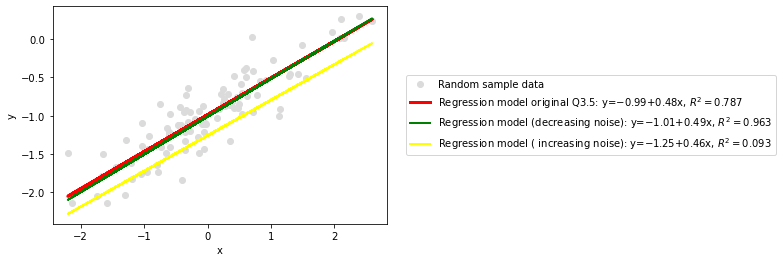

In [22]:
# Recalculate using noise
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression # Fit the model with sklearn package

import warnings
warnings.filterwarnings("ignore")

np.random.seed(111)

mu=0
n=100
sigma_orig=1
sigma_esp_orig=0.25
sigma_less=0.1
sigma_more=1.25


x=np.random.normal(loc=mu,scale=sigma_orig,size=n)  # recalculating  Q3.1

esp_orig=np.random.normal(loc=mu,scale=sigma_esp_orig,size=n)  # recalculating  Q3.2 sigma=0.25
esp_orig

esp_less=np.random.normal(loc=mu,scale=sigma_less,size=n) # Code for Q3.7 sigma=0.1
esp_less

esp_more=np.random.normal(loc=mu,scale=sigma_more,size=n) # Code for Q3.7 sigma=1.25
esp_more

y=-1 +(0.5*x)+esp_orig # recalculating  Q3.3

y_more=-1 +(0.5*x)+esp_more

y_less=-1 +(0.5*x)+esp_less


#create a dataframe of the random values
d_ = {'x': x,'y': y,"y_more":y_more, "y_less":y_less}
df = pd.DataFrame(data=d_)
df.head()

X=df[["x"]].values
y_more=df[["y_more"]].values
y_less=df[["y_less"]].values

############ recalculating Q3.5 to compare esp sigma = 0.25 ##########################
lr = LinearRegression() 
lr.fit(X, y)
intercept_orig=lr.intercept_
print("Q3.5 original: intercept = ",intercept_orig)
slope_orig=lr.coef_
print("Q3.5 original: slope = ",slope_orig)
# Returns the R^2 which gives an idea about the goodness of fit:
r_2_orig=round(lr.score(X, y),3)
print("Q3.5 original: r-squared: ", r_2_orig)

y_pred_orig=lr.predict(X)

############ testing increasing noise by having esp sigma = 1.25 ##########################
lr = LinearRegression() 
lr.fit(X, y_more)
intercept_more=lr.intercept_
print("increasing noise model: intercept  = ",intercept_more)
slope_more=lr.coef_
print("increasing noise model: slope  = ",slope_more)
# Returns the R^2 which gives an idea about the goodness of fit:
r_2_more=round(lr.score(X, y_more),3)
print("increasing noise model: r-squared  = ", r_2_more)

y_pred_more=lr.predict(X)

############ testing decreasing noise by having sigma = 0.1 ##########################
lr = LinearRegression() 
lr.fit(X, y_less)
intercept_less=lr.intercept_
print("decreasing noise model: intercept = ",intercept_less)
slope_less=lr.coef_
print("decreasing noise model: slope = ",slope_less)
# Returns the R^2 which gives an idea about the goodness of fit:
r_2_less=round(lr.score(X, y_less),3)
print("decreasing noise model: r-squared = ", r_2_less)

y_pred_less=lr.predict(X)

_=plt.scatter(X, y, label='Random sample data', color=sns.color_palette('gray')[-1])
_=plt.plot(X, y_pred, color='red', linewidth=3, label='Regression model original Q3.5: y=−0.99+0.48x, $R^2= %.3f$' % r_2)
_=plt.plot(X, y_pred_less, color='green', linewidth=2, label='Regression model (decreasing noise): y=−1.01+0.49x, $R^2= %.3f$' % r_2_less)
_=plt.plot(X, y_pred_more, color='yellow', linewidth=2, label='Regression model ( increasing noise): y=−1.25+0.46x, $R^2= %.3f$' % r_2_more)
_=plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
_=plt.xlabel('x')
_=plt.ylabel('y')

plt.show()

**Slopes** maintains almost the same magnitude: for the original Q3.5 model (i.e., 𝜖 scale=0.25) slope=0.48. By increasing the noise (i.e., 𝜖 scale=1.25) slope=0.46 and by decreasing the noise (i.e., 𝜖 scale=0.1) slope= 0.49 

**Intercepts** increased negatively slightly when the noise increased (i.e., 𝜖 scale=1.25), intercept=-1.26. The original Q3.5 model (i.e., 𝜖 scale=0.25) intercept=-0.99 and by decreasing noise (i.e., 𝜖 scale=0.1), intercept = -1.01 

**R-squared** had the best fit for the decreased noise model, R^2=96.3%. Followed by original Q3.5 model (i.e., 𝜖 scale=0.25) R^2=78.7%. The worst R-squared was for the increased noise model (i.e., 𝜖 scale=1.25) where R^2=9.3% fitting the model